## Import libraries

In [1]:
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from matplotlib import gridspec
import matplotlib.colors as mcolors
from scipy.signal import spectrogram
from bisect import bisect
from matplotlib.colors import LogNorm, Normalize

%cd /media/Projects/Adrian/SD_analysis/

#from spectral_analysis import *
from sd_calculation import *

/media/Projects/Adrian/SD_analysis


## Create plot function

In [2]:
def plotObject(nrRows=1, nrCols=1, nrSubjects=1, height_ratios=False, myDpi=92, lenXax=1900, lenYax=1024, shareX=False, shareY=False):
    '''
    '''
    nr_rows = nrRows*nrSubjects
    
    fig, axs = plt.subplots(nr_rows, nrCols, figsize=(lenXax/myDpi, lenYax/myDpi), sharex=shareX, sharey=shareY)
    if height_ratios:
        #print(hight_rations*nr_rows, nr_rows)
        gs = gridspec.GridSpec(nr_rows, nrCols, height_ratios=height_ratios*nrSubjects)
    else:
        gs = gridspec.GridSpec(nr_rows, nrCols)
    spines = ('top', 'right', 'bottom')
    
    for i in range(nr_rows):
        #if nr_rows==1:
        #    cur_ax = axs
        #else:
        #    curr_ax = axs[i]
        axs[i] = plt.subplot(gs[i])
        for sp in spines: 
            axs[i].spines[sp].set_visible(False)
        axs[i].tick_params(bottom=False, labelbottom=False)
    axs[i].spines[sp].set_visible(True)
    axs[i].tick_params(bottom=True, labelbottom=True)
    #remove spines
   
    fig.tight_layout()
    fig.subplots_adjust(hspace=.0)
    #fig.tight_layout()
    #plt.show()
    return fig, axs

## Touch data

In [13]:
path = '/media/Seizures/Wenzel/mouse_tetrode/'
ks = [os.path.basename(x) for x in os.listdir(path) if os.path.isdir((os.path.join(path,x)))]

pathfiles = {k:[] for k in ks}

for (dirpath, dirnames, filenames) in os.walk(path):
    #print(dirpath)
    #mice = os.path.basename()
    for filename in filenames:
        if filename.endswith('.mat'):
            mouse = os.path.basename(dirpath)
            pathfiles[mouse].append(os.path.join(dirpath, filename))

In [4]:
events_to_keep = ['/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-27_16-13-12.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-13_11-40-58.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-28_15-42-36.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-19_09-59-45.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-20_10-23-10.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-23_11-06-54.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-22_11-11-42.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-25_15-36-12.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-11_10-42-30.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-15_10-45-33.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-03-07_14-23-45.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-18_14-45-09.mat',
'/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-21_11-40-59.mat']

In [50]:
pathfiles

{'mouse_06': ['/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-27_16-13-12.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-13_11-40-58.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-28_15-42-36.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-19_09-59-45.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-20_10-23-10.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-23_11-06-54.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-22_11-11-42.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-26_10-02-17.mat'],
 'mouse_04': ['/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat',
  '/media/Seizures/Wenzel/mouse_tetrode

In [51]:
for key, val in pathfiles.items():
    for i, k in enumerate(val):
        if k not in events_to_keep:
            print( pathfiles[key][i])
            del pathfiles[key][i]

/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-26_10-02-17.mat


In [53]:
pathfiles

{'mouse_06': ['/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-27_16-13-12.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-13_11-40-58.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-28_15-42-36.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-19_09-59-45.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-20_10-23-10.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-23_11-06-54.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-22_11-11-42.mat'],
 'mouse_04': ['/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat',
  '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-25_15-36-12.mat',
  '/media/Seizures/Wenzel/mouse_tetrode

In [5]:
len(events_to_keep)

17

In [161]:
pathfiles['mouse_04']

['/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat',
 '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat',
 '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat',
 '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat',
 '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-25_15-36-12.mat',
 '/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-11_10-42-30.mat']

## Plot overview

/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-27_16-13-12.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-13_11-40-58.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-28_15-42-36.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-19_09-59-45.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-20_10-23-10.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-23_11-06-54.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-22_11-11-42.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-25_15-36-12.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-11_10-42-30.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_20

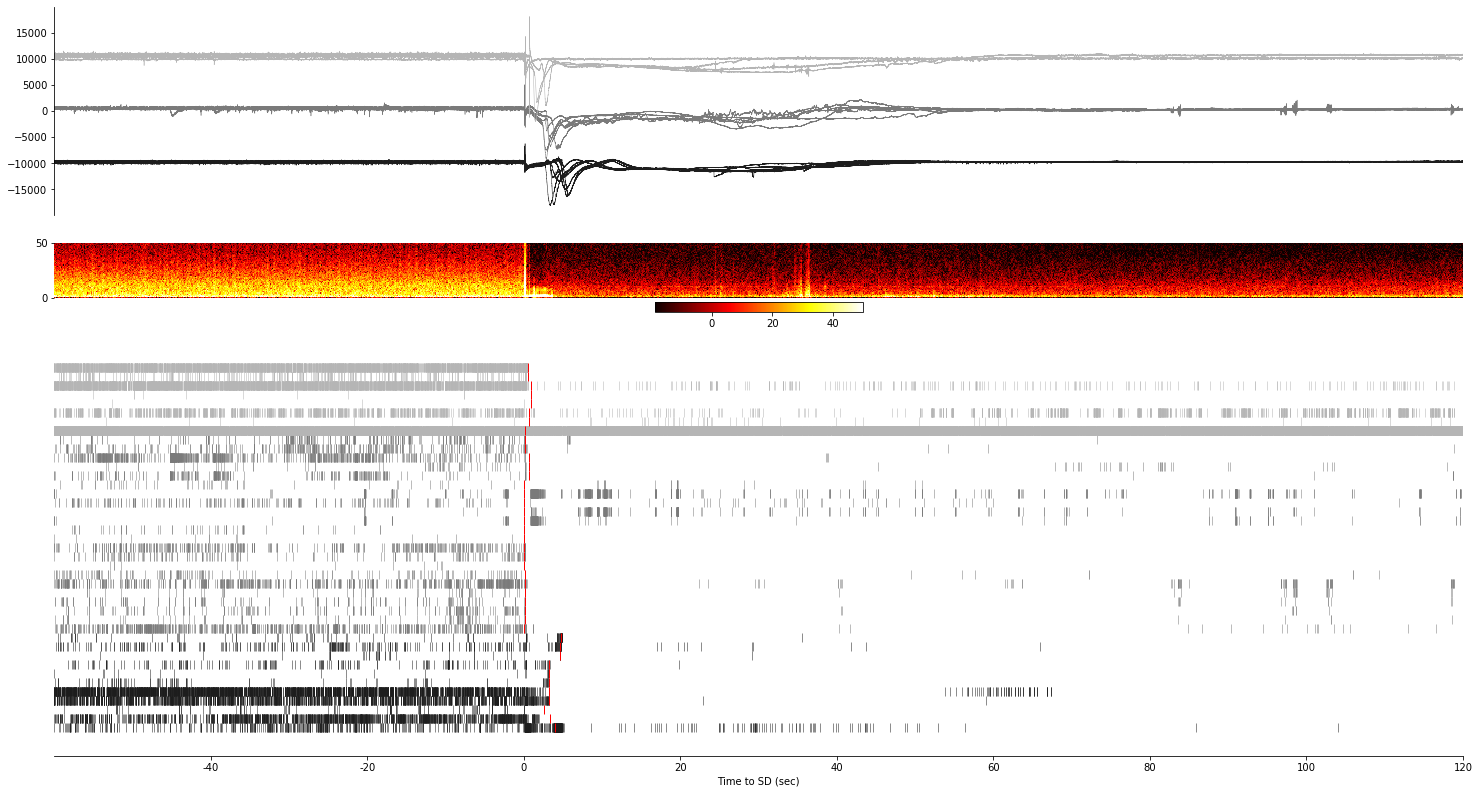

In [108]:
#list(pathfiles.keys())

from matplotlib import cm

gray_cm = cm.get_cmap('Greys')


color_dic = dict.fromkeys(list(pathfiles.keys()))
color_dic['mouse_02'] = 0.4
color_dic['mouse_04'] = 0.6
color_dic['mouse_06'] = 0.9

shift_dic = dict.fromkeys(list(pathfiles.keys()))
shift_dic['mouse_02'] = 10000
shift_dic['mouse_04'] = 0
shift_dic['mouse_06'] = -10000



sd_indices = []
min_val, max_val = [], []
sec_before = 60
sec_after = 120
fmin = 0
fmax = 50
counter = 0
buffer_ms=800

# Create plot with three subplots
fig, ax = plotObject(nrRows=3, nrCols=1, nrSubjects=1, shareX=True, height_ratios=[3,1,6])

# Dictionary to store event times for each mouse
all_units_ts = {mouse: [] for mouse in pathfiles.keys()}
all_sd_delays = {mouse: [] for mouse in pathfiles.keys()}

for mouse, fnames in pathfiles.items():
    curr_color = gray_cm(color_dic[mouse])
    curr_shift = shift_dic[mouse]
    
    for index, f in enumerate(fnames):
        print(f)
        matfile = loadmat(f, squeeze_me=True)
        sd_index = matfile['binSD']
        lfp = matfile['LFP']
        ts_lfp = matfile['LFP_ts']
        ts_spikes = matfile['ts']
        
        ixb = bisect(ts_lfp, sec_before * -1)
        ixa = bisect(ts_lfp, sec_after)
        toplot = np.subtract(lfp[ixb:ixa], np.nanmean(lfp[ixb:ixa]))*-1
        ts_toplot = ts_lfp[ixb:ixa]
        ix0 = bisect(ts_toplot, 0)
        ix10 = bisect(ts_toplot, 10)
        tofilt = toplot[ix0:ix10]
        
        filt = butter_lowpass_filter(tofilt, cutoff=2, fs=2000, order=1)
        first_der = np.diff(filt[buffer_ms:], n=1)
        min_fd = first_der.argmin()
        sd_del = ts_toplot[ix0:][min_fd+buffer_ms]
        #print(sd_del)
        t, fr, spg = spectrogram(toplot, fs=2000, nperseg=400, noverlap=150, scaling='density')
        dbspg = 20 * np.log10(spg[fmin:fmax, ])
        
        if counter == 0:
            mean_spg = dbspg
        else:
            old_spg = mean_spg
            mean_spg = np.asarray([np.nanmean([old_spg[ii], dbspg[ii]], axis=0) for ii, fr in enumerate(dbspg)])
        
        ax[0].plot(ts_lfp[ixb:ixa], (toplot) + curr_shift, c=curr_color, linewidth=0.5)
        
        if ts_spikes.size > 0:
            if not isinstance(ts_spikes[0], np.ndarray):
                units_ts = np.asarray(ts_spikes)
                all_units_ts[mouse].append(units_ts)
                all_sd_delays[mouse].append(sd_del-mod_sd_delays[mouse][index])
            else:
                units_ts = ts_spikes
                for i, cu in enumerate(units_ts):
                    all_units_ts[mouse].append(cu)
                    all_sd_delays[mouse].append(sd_del-mod_sd_delays[mouse][index])
        
        counter += 1

# Plot spectrogram
spec = ax[1].imshow(np.subtract(mean_spg, np.nanmean(mean_spg.flatten())), aspect='auto', cmap='hot', origin='lower',
                    extent=[sec_before * -1, sec_after, fmin, fmax], norm=Normalize(vmin=-19, vmax=fmax, clip=False))
fig.colorbar(spec, ax=ax[1], orientation='horizontal', pad=0.05)
ax[0].set_xlim(ts_lfp[ixb], ts_lfp[ixa])
#ax[0].set_yticks([])
#ax[0].spines['left'].set_visible(False)
ax[0].tick_params(left=True, labelleft=True)
ax[1].set_yticks([fmin, fmax])
ax[1].set_yticklabels([fmin, fmax], fontsize=10)
#ax[1].set_ylabel('Frequency (Hz)', fontsize=12)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
#ax[2].set_xlim(sec_before * -1, sec_after)
ax[2].set_xlim(ts_lfp[ixb], ts_lfp[ixa])
ax[2].set_xlabel('Time to SD (sec)', fontsize=10)
ax[2].set_yticks([])
ax[2].spines['left'].set_visible(False)

# Plot eventplot for each mouse with lineoffsets
lineoffset = 0
for mouse, units_ts in all_units_ts.items():
    if units_ts:  # Check if the list is not empty
        for i, u in enumerate(units_ts):
            ax[2].eventplot(u, lineoffsets=[lineoffset], colors=[gray_cm(color_dic[mouse])],
                           linewidths=0.5)
            x_coord = all_sd_delays[mouse][i]
            print(x_coord)
            ax[2].vlines(x=x_coord, ymin=lineoffset-0.5, ymax=(lineoffset+1)-0.5, color='red', linewidth=1)
            lineoffset += 1
            #x_coord +=1
#xticks = ax[2].get_xticks()
ax[2].set_xticklabels(ax[2].get_xticks().astype(int), fontsize=10)

plt.tight_layout()
plt.show()

In [93]:
all_sd_delays

{'mouse_06': [3.951560000000172,
  3.3355900000005203,
  2.6020910000002915,
  3.170841000000164,
  3.170841000000164,
  3.173466000000226,
  3.173466000000226,
  3.173466000000226,
  4.659027999999944,
  4.659027999999944,
  4.681715000000077],
 'mouse_04': [0.05915299999960544,
  0.05762200000003759,
  0.05762200000003759,
  0.05762200000003759,
  0.05762200000003759,
  0.05762200000003759,
  0.12934099999984028,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  0.053685000000041505,
  3.472465000000375,
  3.472465000000375,
  3.472465000000375,
  0.11059000000022934,
  0.11059000000022934],
 'mouse_02': [0.14003700000033859,
  0.693964999999589,
  0.693964999999589,
  0.9096390000006067,
  0.9096390000006067,
  0.9096390000006067,
  0.5467180000002372,
  0.5467180000002372]}

In [567]:
bisect(ts_spikes[0], 0)

9072

### Save figure

In [109]:
#fig.savefig(os.path.join('/media/Seizures/Wenzel/mouse_tetrode/', 'tetrode_trimodalplot.png'), bbox_inches='tight')

figname = 'tetrode_trimodalplot_SDonly_modifiedOnset_labels'
figformat = 'eps'

figoutname = os.path.join(path, '.'.join([figname, figformat]))

fig.savefig(figoutname,
            format=figformat,
            dpi=300,
            bbox_inches='tight')

## Plot inserts

/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-27_16-13-12.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-13_11-40-58.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-28_15-42-36.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-19_09-59-45.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-20_10-23-10.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-23_11-06-54.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-22_11-11-42.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-25_15-36-12.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-11_10-42-30.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_20

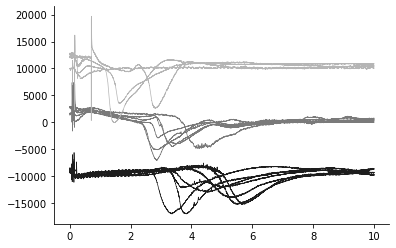

In [110]:
#plot LFP

sd_indices = []
min_val, max_val = [],[]

sec_before = 0
sec_after = 10

#fig, ax = plotObject(nrRows=3, nrCols=1, nrSubjects=1, shareX=True, height_ratios=[1,0.2,1])
fig2, ax2 = plt.subplots()


# Dictionary to store event times for each mouse
all_units_ts = {mouse: [] for mouse in pathfiles.keys()}

for mouse, fnames in pathfiles.items():
    curr_color = gray_cm(color_dic[mouse])
    curr_shift = shift_dic[mouse]
    
    for f in fnames:
        print(f)
        matfile = loadmat(f, squeeze_me=True)
        sd_index = matfile['binSD']
        lfp = matfile['LFP']
        ts_lfp = matfile['LFP_ts']
        ts_spikes = matfile['ts']
        
        ixb = bisect(ts_lfp, sec_before * -1)
        ixa = bisect(ts_lfp, sec_after)
        toplot = np.subtract(lfp[ixb:ixa], np.nanmean(lfp[ixb:ixa]))
        
        ax2.plot(ts_lfp[ixb:ixa], (toplot*-1) + curr_shift, c=curr_color, linewidth=0.7)
        
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
#ax2.set_yticks([])
plt.show()

### Save figure

In [111]:
figname2 = f'tetrode_trimodalplot_inset_{sec_after}sec_labels'
figformat2 = 'eps'

figoutname2 = os.path.join(path, '.'.join([figname2, figformat2]))

fig2.savefig(figoutname2,
            format=figformat2,
            dpi=300,
            bbox_inches='tight')

In [54]:
mod_sd_delays = {mouse: [int]*len(events) for mouse, events in pathfiles.items()}

In [112]:
mod_sd_delays

{'mouse_06': [0.78, 0.33, 0.4, 0.44, 0.46, 0.6, 0.6],
 'mouse_04': [3.1, 2.4, 2.5, 2.8, 3.2, 3],
 'mouse_02': [0.26, 0.88, -0.2, 0.8]}

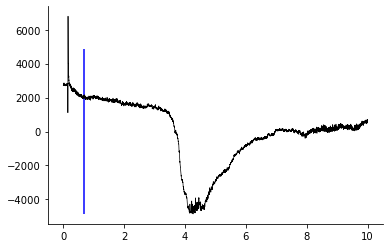

In [103]:
fig, ax = plt.subplots()
m_='mouse_04'
i_ = 4
f = pathfiles[m_][i_]
sec_before = 0
sec_after = 10
buffer_ms = 800
resta = 3.2

mod_sd_delays[m_][i_] = resta

#plot
matfile = loadmat(f, squeeze_me=True)
sd_index = matfile['binSD']
lfp = matfile['LFP']
ts_lfp = matfile['LFP_ts']
ts_spikes = matfile['ts']

ixb = bisect(ts_lfp, sec_before * -1)
ixa = bisect(ts_lfp, sec_after)
toplot = np.subtract(lfp[ixb:ixa], np.nanmean(lfp[ixb:ixa]))*-1
filt = butter_lowpass_filter(toplot, cutoff=2, fs=2000, order=1)

first_der = np.diff(filt[buffer_ms:], n=1)
min_fd = first_der.argmin()
bis = ts_lfp[ixb:ixa][min_fd+buffer_ms]
bis =bis- resta
#mod_sd_delays[m_].append(resta)
ax.plot(ts_lfp[ixb:ixa], (toplot), c='k', linewidth=0.7)
#ax.plot(ts_lfp[ixb:ixa], (filt), c='r', linewidth=0.7)
ax.vlines(x=bis, ymin=min(toplot), ymax=max(toplot*-1), colors='b')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.set_yticks([])

plt.show()

In [590]:
figname2 = f'tetrode_doubleSD_{m_}_{os.path.basename(f)}'
figformat2 = 'eps'

figoutname2 = os.path.join(path, '.'.join([figname2, figformat2]))

fig.savefig(figoutname2,
            format=figformat2,
            dpi=300,
            bbox_inches='tight')

In [538]:
mod_sd_delays['mouse_02'] = []

In [525]:
mod_sd_delays

{'mouse_06': [0.78, 0.33, 0.4, 0.44, 0.46, 0.6, 0.6],
 'mouse_04': [3.1, 2.5, 2.5, 2.8],
 'mouse_02': [0.26, 0.88, -1.6, 0.8]}

In [ ]:
mod_sd_delays = {'mouse_06': [0.78, 0.33, 0.4, 0.44, 0.46, 0.6, 0.6],
 'mouse_04': [3.1, 2.5, 2.5, 2.8],
 'mouse_02': [0.26, 0.88, -1.6, 0.8]}

In [577]:
for key, val in all_sd_delays.items():
    
    #print(key, np.unique(val).tolist())
    uq = np.unique(val).tolist()
    for i, v in enumerate(uq):
        print(key, os.path.basename(pathfiles[key][i]), v)

mouse_06 SD_2023-06-27_16-13-12.mat 2.6020910000002915
mouse_06 SD_2023-06-13_11-40-58.mat 3.170841000000164
mouse_06 SD_2023-06-28_15-42-36.mat 3.173466000000226
mouse_06 SD_2023-06-19_09-59-45.mat 3.3355900000005203
mouse_06 SD_2023-06-20_10-23-10.mat 3.951560000000172
mouse_06 SD_2023-06-23_11-06-54.mat 4.659027999999944
mouse_06 SD_2023-06-22_11-11-42.mat 4.681715000000077
mouse_04 SD_2023-05-09_10-59-59.mat 0.053685000000041505
mouse_04 SD_2023-05-16_13-07-32.mat 0.05762200000003759
mouse_04 SD_2023-05-24_11-36-24.mat 0.05915299999960544
mouse_04 SD_2023-05-12_11-26-43.mat 0.11059000000022934
mouse_04 SD_2023-05-25_15-36-12.mat 0.12934099999984028
mouse_04 SD_2023-05-11_10-42-30.mat 0.17246500000037468
mouse_02 SD_2023-02-15_10-45-33.mat 0.14003700000033859
mouse_02 SD_2023-03-07_14-23-45.mat 0.14671800000023727
mouse_02 SD_2023-02-18_14-45-09.mat 0.17396499999958914
mouse_02 SD_2023-02-21_11-40-59.mat 0.7096390000006068


In [175]:
all_sd_delays = {'mouse_02': [],
                }

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Apr 19 18:23:14 2024',
 '__version__': '1.0',
 '__globals__': [],
 'LFP': array([2465.20996094, 2427.36816406, 2389.52636719, ..., 2163.0859375 ,
        2146.60644531, 2158.203125  ]),
 'LFP_ts': array([-1281.232782, -1281.232282, -1281.231782, ...,  6830.125718,
         6830.126218,  6830.126718]),
 'binSD': 1282,
 'binSpikeRateMtx': array([[ 3, 14, 18, ...,  0,  1,  3],
        [49, 48, 56, ..., 28, 27, 17]], dtype=uint8),
 'highBound': array([-1280.232782, -1279.232782, -1278.232782, ...,  6827.767218,
         6828.767218,  6829.767218]),
 'lowBound': array([-1281.232782, -1280.232782, -1279.232782, ...,  6826.767218,
         6827.767218,  6828.767218]),
 'ts': array([array([-1280.894687, -1280.644387, -1280.418287, ...,  6829.168013,
                6829.241613,  6829.705313])                                ,
        array([-1281.232387, -1281.228187, -1281.201387, ...,  6829.600513,
                6829.6

In [223]:
all_units_ts['mouse_06'][0][0]

-1197.4923979999999

In [3]:
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-27_16-13-12.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-13_11-40-58.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-28_15-42-36.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-19_09-59-45.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-20_10-23-10.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-23_11-06-54.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_06/SD_2023-06-22_11-11-42.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-09_10-59-59.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-16_13-07-32.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-24_11-36-24.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-12_11-26-43.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-25_15-36-12.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_04/SD_2023-05-11_10-42-30.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-15_10-45-33.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-03-07_14-23-45.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-18_14-45-09.mat
/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-21_11-40-59.mat

In [21]:
matfile = loadmat('/media/Seizures/Wenzel/mouse_tetrode/mouse_02/SD_2023-02-18_14-45-09.mat', squeeze_me=True)

In [22]:
matfile['ts']

array([array([-4326.060513, -4313.062313, -4289.939613, ...,  3248.615287,
               3272.940387,  3276.433787])                                ,
       array([-4260.844813, -4260.506813, -4231.652313, ...,  3292.143287,
               3292.516087,  3314.144687])                                ,
       array([-4355.508013, -4355.502513, -4355.476213, ...,  3314.650487,
               3314.655187,  3314.668887])                                ],
      dtype=object)